# XGBoost
Following this notebook: https://www.kaggle.com/shreayan98c/boston-house-price-prediction#SVM-Regressor

In [46]:
from numpy import loadtxt
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# Import XGBoost Regressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from matplotlib import rcParams

#load data
above = '../../../'
# val_file = above + 'assessment_og.pkl'
# valuation = pd.read_pickle(val_file)
data = pd.read_pickle(above + 'd_PCmd.pkl')
# df_file = above + 'post_eda.pkl'
# data = pd.read_pickle(df_file)

# The segement below is the top90 most important features as determined by SelectKBest and DecisionTreeRegressor
# data = data[['a_count', 'c_count', 'd_3_bedroom_units_pct',
#        'd_9th_to_12th_grade_no_diploma_pct',
#        'd_households_200000_or_more',
#        'd_households_from_35000_to_49999_pct', 'd_total_households',
#        's_building_class_at_sale', 's_zipcode', 'v_fullval', 'v_stories',
#        'd_1_bedroom_units', 'd_1_bedroom_units_pct', 'd_2_bedroom_units',
#        'd_4_bedroom_units_pct', 'd_5_bedroom_units_pct',
#        'd_american_indian_and_alaska_native_population',
#        'd_american_indian_and_alaska_native_population_pct',
#        'd_associates_degree_pct', 'd_bachelors_degree',
#        'd_bachelors_degree_pct', 'd_graduate_or_professional_degree',
#        'd_graduate_or_professional_degree_pct',
#        'd_high_school_graduate_pct', 'd_households_200000_or_more_pct',
#        'd_households_from_10000_to_14999',
#        'd_households_from_150000_to_199999',
#        'd_households_from_25000_to_34999_pct',
#        'd_households_from_50000_to_74999_pct',
#        'd_households_from_75000_to_99999_pct',
#        'd_households_less_than_10000', 'd_mean_household_income_dollars',
#        'd_median_household_income_dollars', 'd_median_housing_price',
#        'd_no_bedroom_units', 'd_no_bedroom_units_pct',
#        'd_some_college_no_degree_pct', 'd_total_housing_units',
#        'd_units_1000000_or_more', 'd_units_1000000_or_more_pct',
#        'd_units_from_100000_to_149999',
#        'd_units_from_100000_to_149999_pct',
#        'd_units_from_150000_to_199999',
#        'd_units_from_150000_to_199999_pct',
#        'd_units_from_200000_to_299999',
#        'd_units_from_200000_to_299999_pct',
#        'd_units_from_300000_to_499999',
#        'd_units_from_300000_to_499999_pct', 'd_white_population',
#        's_borough', 'd_5_bedroom_units',
#        'd_9th_to_12th_grade_no_diploma_pct',
#        'd_black_or_african_american_population',
#        'd_households_from_100000_to_149999_pct',
#        'd_households_from_150000_to_199999_pct',
#        'd_households_from_25000_to_34999', 'd_less_than_9th_grade',
#        'd_native_hawaiian_and_other_pacific_islander_population',
#        'd_native_hawaiian_and_other_pacific_islander_population_pct',
#        'd_units_from_50000_to_99999', 'd_units_less_than_50000_pct',
#        'd_white_population_pct', 'imputed_land_area',
#        'm_10yr_treasury_constant_maturity_rate',
#        'm_10yr_treasury_constant_maturity_rate_%chg',
#        'm_30yr_fixed_rate_mortgage_avg_in_us',
#        'm_30yr_fixed_rate_mortgage_avg_in_us_%chg',
#        'm_case_shiller_ny_home_price_index',
#        'm_case_shiller_ny_home_price_index_%chg',
#        'm_case_shiller_us_national_home_price_index',
#        'm_case_shiller_us_national_home_price_index_%chg',
#        'm_consumer_price_index', 'm_consumer_price_index_%chg',
#        'm_core_cpi', 'm_core_cpi_%chg', 'm_effective_fed_funds_rate',
#        'm_effective_fed_funds_rate_%chg', 'm_inflation_rate',
#        'm_inflation_rate_%chg', 'm_population_level',
#        'm_population_level_%chg', 'm_real_gross_domestic_product_%chg',
#        'm_sp500_index', 'm_sp500_index_%chg', 'm_unemployment_rate',
#        'm_unemployment_rate_%chg', 'm_us_real_median_household_income',
#        'm_us_real_median_household_income_%chg', 's_year_built', 'v_nta', 's_sale_price']]

scaler = StandardScaler()
X = data.drop('s_sale_price', axis=1)
X = scaler.fit_transform(X)
y = data['s_sale_price']

# split data into train and test sets
seed = 1002
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#Create a XGBoost Regressor
reg = XGBRegressor()

# fit model no training data
#model = xgb.XGBRegressor()#objective ='reg:squarederror') #, colsample_bytree = 0.3, learning_rate = 0.1,
                #max_depth = 5, alpha = 10, n_estimators = 10)
reg.fit(X_train, y_train)
# Model prediction on train data
y_pred = reg.predict(X_train)

In [47]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9684601946949967
Adjusted R^2: 0.9684396903358073
MAE: 125190.5639199034
MSE: 55194640765.044235
RMSE: 234935.39700318518


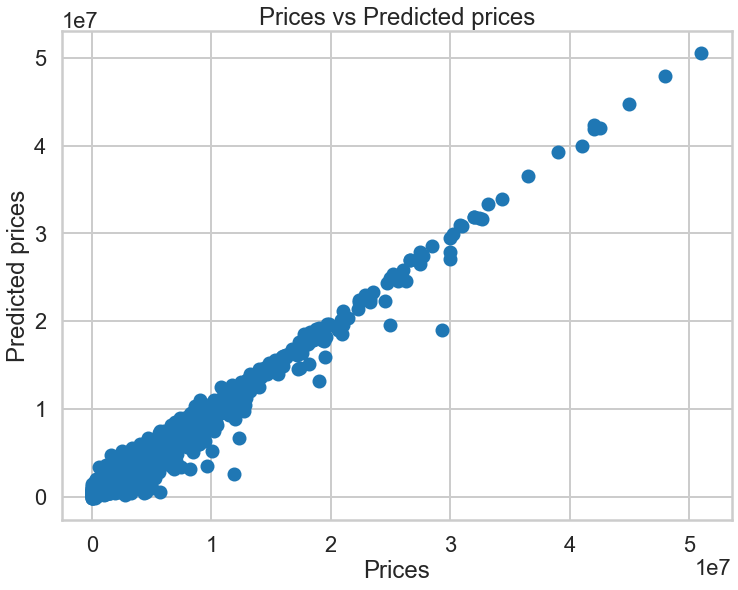

In [48]:
# Visualizing the differences between actual prices and predicted values
plt.figure(figsize=(12,9))
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [49]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [50]:
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7314883212734997
Adjusted R^2: 0.7311336787463449
MAE: 180786.49408861532
MSE: 508942807335.17474
RMSE: 713402.2759531783


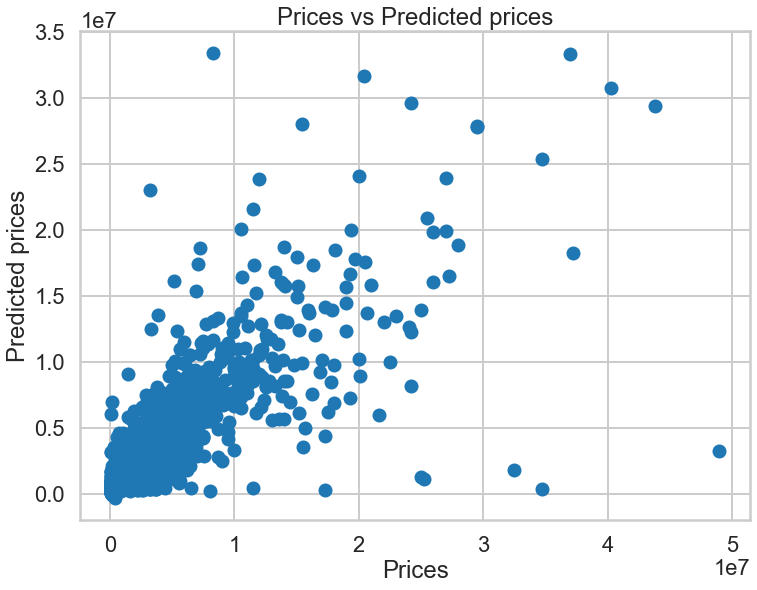

In [51]:
# Visualizing the differences between actual prices and predicted values
plt.figure(figsize=(12,9))
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

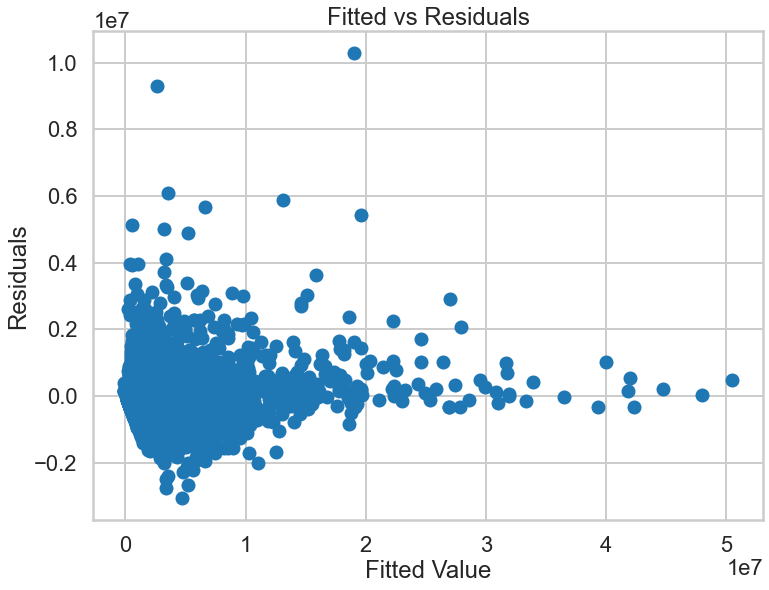

In [52]:
# Checking residuals
plt.figure(figsize=(12,9))
plt.scatter(y_pred,y_train-y_pred)
plt.title("Fitted vs Residuals")
plt.xlabel("Fitted Value")
plt.ylabel("Residuals")
plt.show()